In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

# 1. Exploratory Data Analysis

## 1.1 Load Data

In [2]:
df0 = pd.read_excel('data-input.xlsx')
df0.info()

In [25]:
df0.describe()

,PER (X),PBV (X),EV/EBTIDA (X),BVPS,ROA,ROE,DER (X),Sales Growth,Operating Income Growth,Net Income Growth,...,Fixed Assets,Total Assets,Current Liabilities,Long Term Debt,Total Liabilities,Total Equity,EPS,Outstanding Shares,Cash From Operating Act,Cash From Investing Act
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,22.537308,3.318654,11.951346,2976.331538,2.286154,-0.056154,1.641538,-13.760385,-51.035192,-393.377692,...,2.897715e+07,7.292258e+07,3.446979e+07,1.301636e+07,4.748615e+07,2.475604e+07,226.181538,18719.980769,6.251000e+06,-4.650168e+06
std,43.877422,7.996354,29.468849,5375.117406,16.023341,37.604398,2.153590,27.763415,242.412491,2168.011493,...,4.610226e+07,2.136870e+08,1.670660e+08,2.013572e+07,1.773333e+08,4.243165e+07,634.551860,27926.638734,1.379256e+07,1.765882e+07
min,-60.350000,0.120000,-68.710000,6.500000,-88.450000,-140.130000,0.080000,-93.950000,-1577.920000,-15358.190000,...,1.174300e+04,1.559900e+04,7.570000e+02,3.200000e+02,1.818000e+03,1.378100e+04,-543.580000,206.000000,-2.373039e+06,-1.160078e+08
25%,4.047500,0.797500,6.290000,321.557500,0.505000,1.305000,0.415000,-27.452500,-45.205000,-76.557500,...,1.265862e+06,4.160043e+06,7.576448e+05,3.627830e+05,1.782152e+06,2.399391e+06,3.947500,2266.250000,1.666752e+05,-1.330188e+06
50%,13.540000,1.300000,8.695000,1189.495000,4.490000,5.945000,1.035000,-11.575000,-19.700000,-24.640000,...,9.687866e+06,1.893220e+07,3.129194e+06,2.556052e+06,6.539200e+06,7.245738e+06,54.050000,6337.000000,1.341656e+06,-3.576365e+05
75%,27.640000,2.730000,18.140000,2378.490000,7.672500,11.382500,1.630000,0.822500,-1.427500,9.647500,...,3.539141e+07,7.805254e+07,1.537184e+07,1.621199e+07,3.486825e+07,2.387414e+07,160.372500,21346.750000,6.200172e+06,-3.830850e+04
max,200.780000,56.790000,147.990000,30415.690000,44.840000,145.090000,10.670000,100.140000,489.530000,492.900000,...,2.058950e+08,1.511805e+09,1.208261e+09,7.008569e+07,1.278346e+09,1.999114e+08,3974.730000,123346.000000,6.668919e+07,1.313300e+07


## 1.2 Data Cleansing

In [3]:
df0.drop(["EMITEN","Minority Interest","Cash From Financing Act","Category"], axis=1, inplace=True)

## 1.3 Scatter Plot

<Figure size 1080x1080 with 0 Axes>

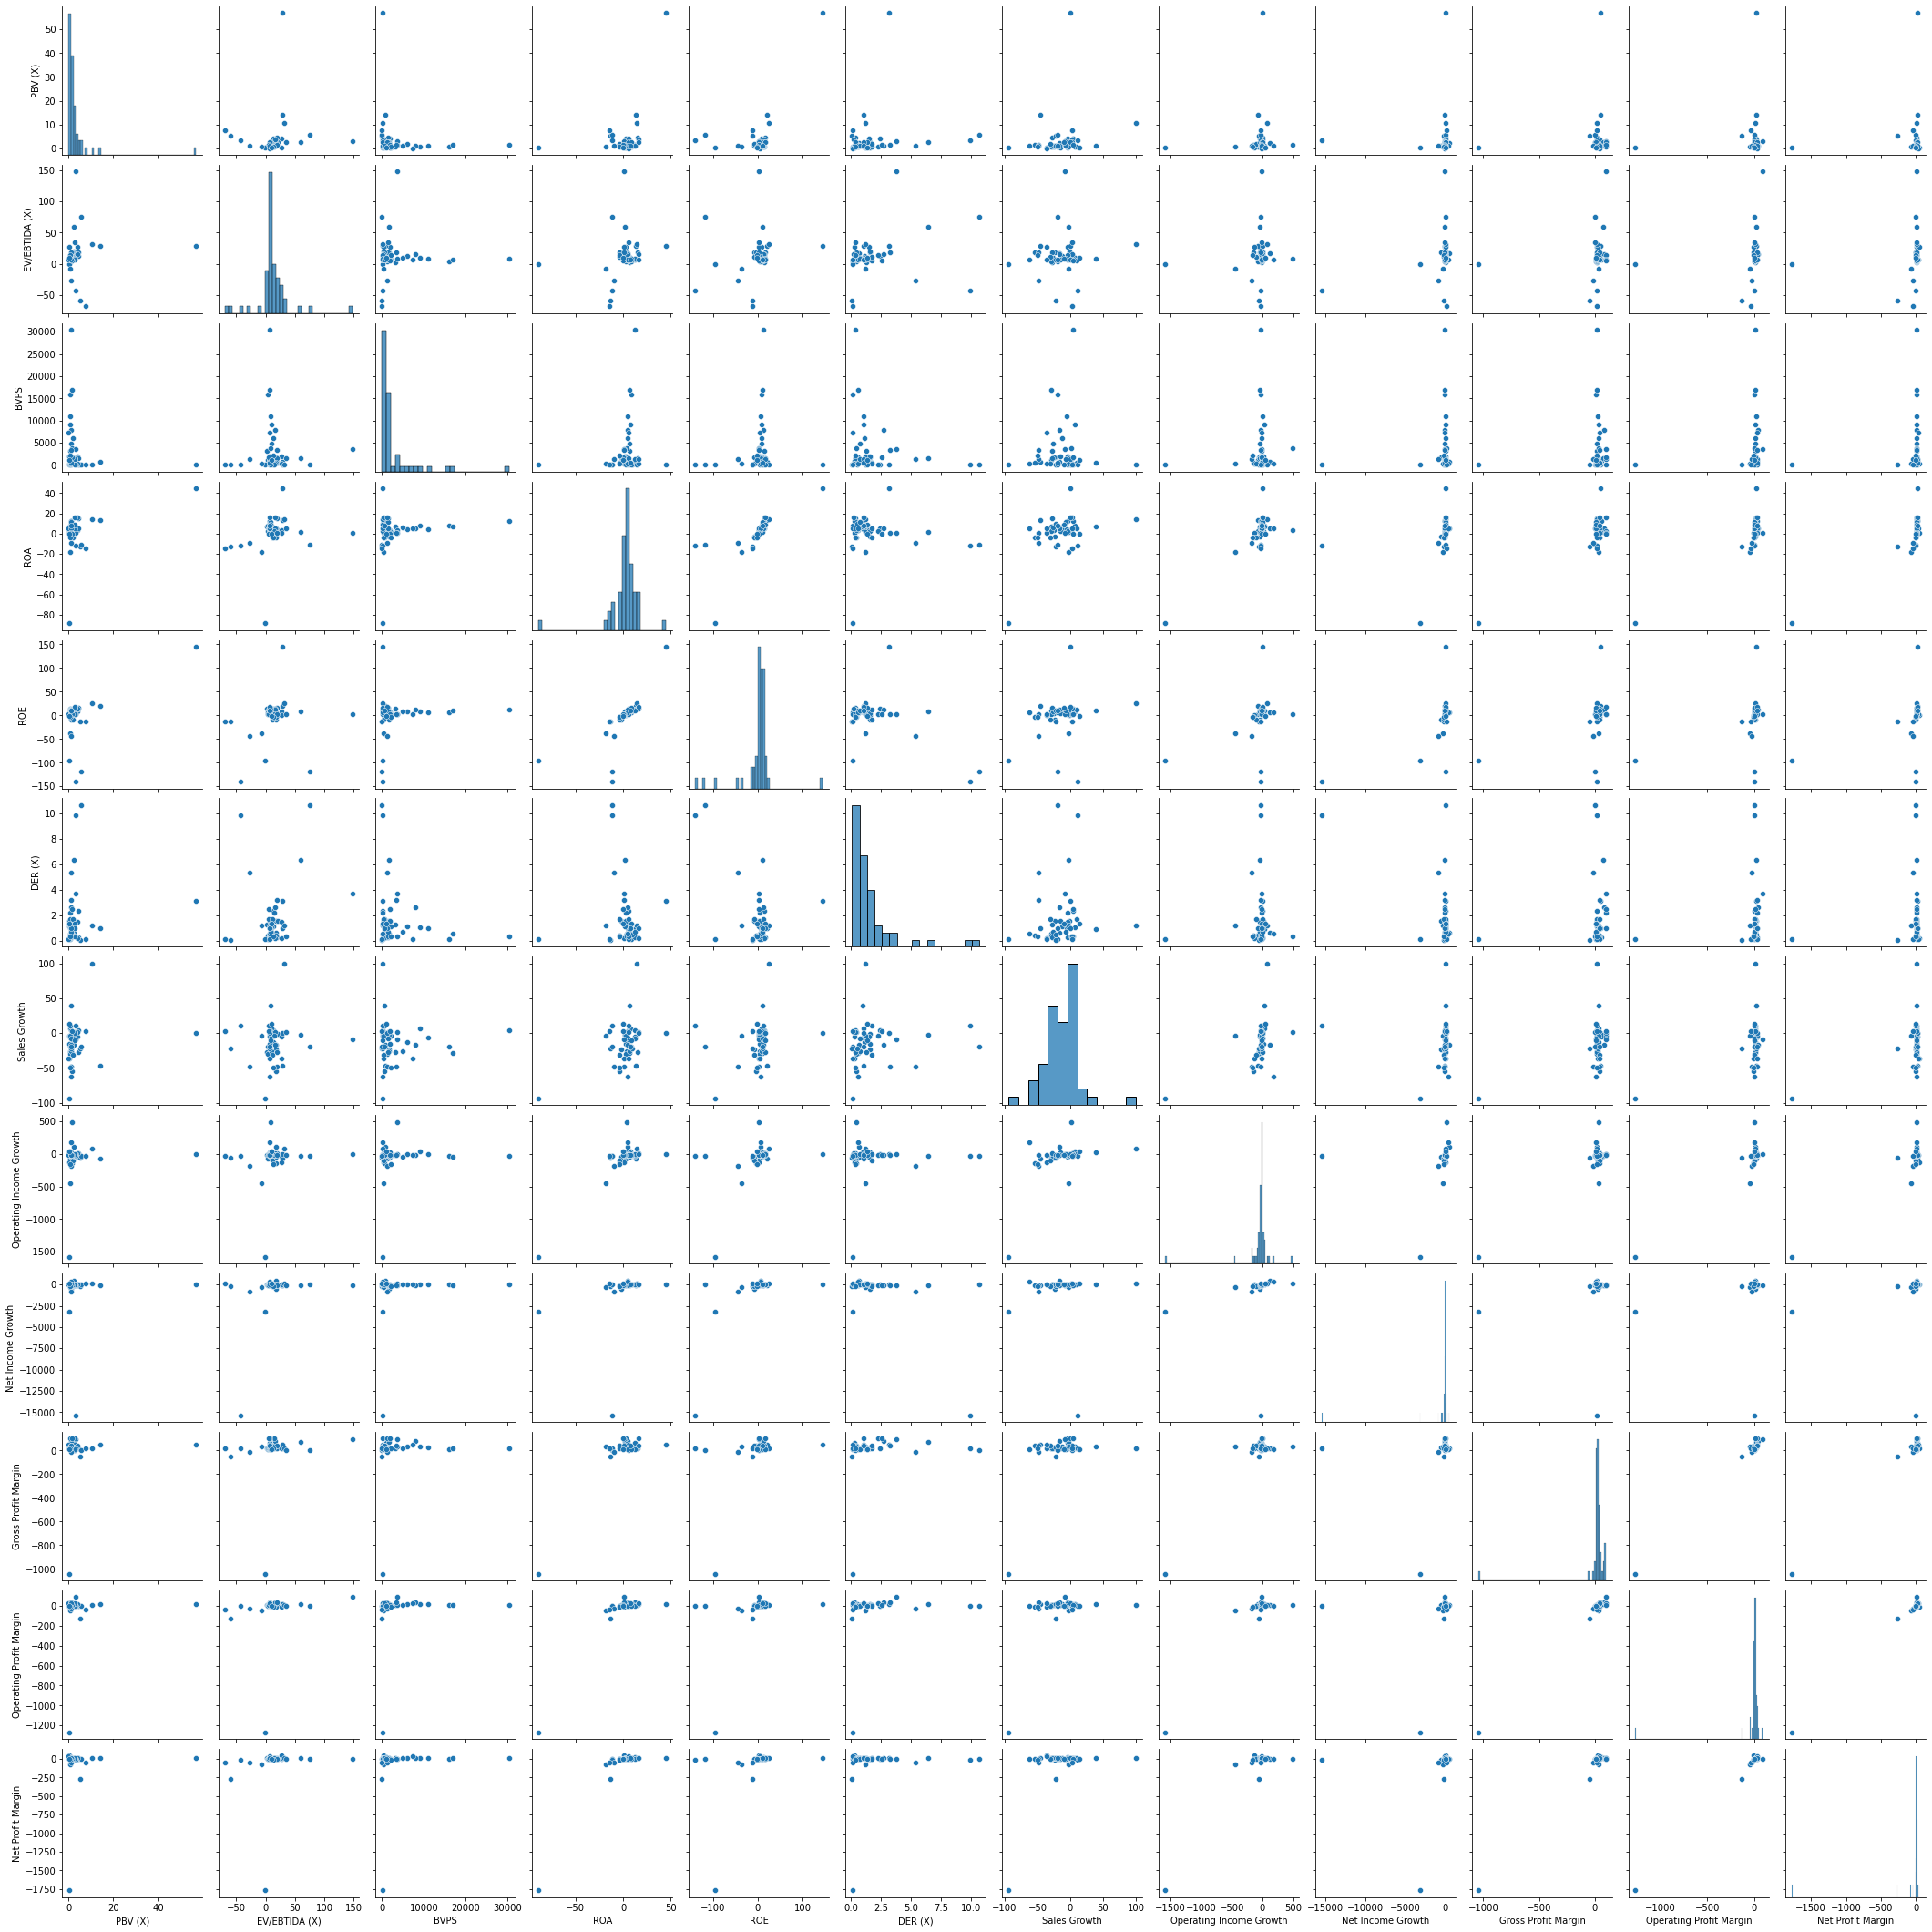

In [26]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

# 2. Clustering

## 2.1 Load Data

In [18]:
df0 = pd.read_excel('data-input.xlsx')
df1 = df0[['DER (X)','Operating Profit Margin','Sales Growth','Category']]
df1.describe()

,DER (X),Operating Profit Margin,Sales Growth,Category
count,50.000000,50.000000,50.000000,0.0
mean,1.688000,10.845400,-12.637200,NaN
std,2.176668,19.648909,25.654668,NaN
min,0.130000,-42.020000,-62.100000,NaN
25%,0.467500,3.000000,-27.127500,NaN
50%,1.035000,10.035000,-11.575000,NaN
75%,1.597500,18.272500,0.525000,NaN
max,10.670000,89.300000,100.140000,NaN


## 2.2 Standardisasi Fitur

In [19]:
feats = ['DER (X)','Operating Profit Margin','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER (X),Operating Profit Margin,Sales Growth
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,-6.994405e-17,1.998401e-17,5.329071e-17
std,1.010153e+00,1.010153e+00,1.010153e+00
min,-7.230397e-01,-2.717816e+00,-1.947598e+00
25%,-5.664120e-01,-4.033329e-01,-5.705556e-01
50%,-3.030455e-01,-4.166275e-02,4.182412e-02
75%,-4.199942e-02,3.818280e-01,5.182616e-01
max,4.168384e+00,4.033359e+00,4.440602e+00


## 2.3 Lakukan K-means

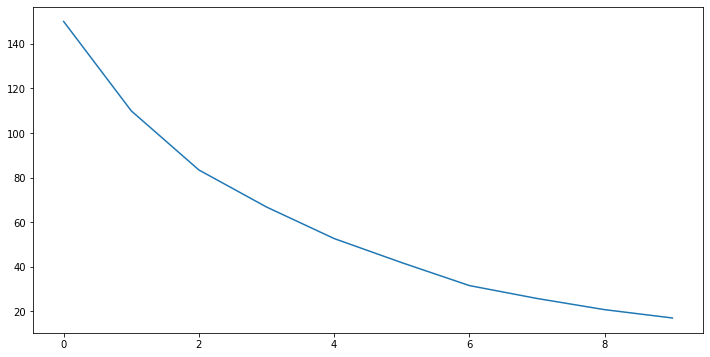

In [20]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

Ternyata clustering paling optimal di 5 cluster (n_cluster = 5)

## 2.4 Pilih Jumlah Cluster

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=5, random_state=0)

In [22]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

## 2.5 Plot Cluster

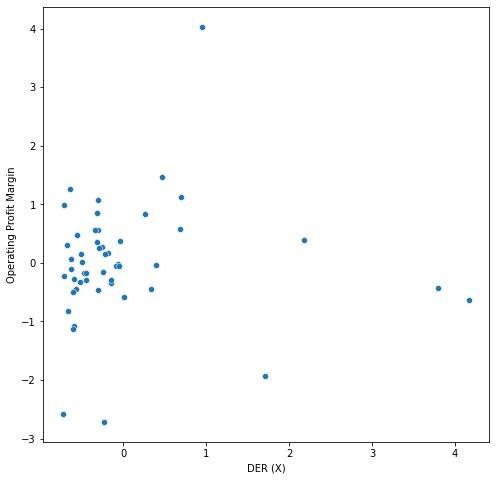

In [23]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER (X)', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [24]:
new_df.head(5)

,DER (X),Operating Profit Margin,Sales Growth,target,fit
0,-0.064043,-0.016215,-0.444654,NaN,4
1,-0.500280,0.020286,-0.510410,NaN,4
2,-0.184705,0.162178,-0.582860,NaN,4
3,-0.040839,0.379129,0.441677,NaN,4
4,-0.254317,0.268597,-0.009166,NaN,4


Assign `fit` to `Category` to create correct colour indicator

In [25]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 2, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 1
new_df.loc[new_df['fit'] == 1, 'Category'] = 2
new_df.loc[new_df['fit'] == 0, 'Category'] = 3
new_df.loc[new_df['fit'] == 3, 'Category'] = 4
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(5)

,Category,DER (X),Operating Profit Margin,Sales Growth,target,fit
0,1,-0.064043,-0.016215,-0.444654,NaN,4
1,1,-0.500280,0.020286,-0.510410,NaN,4
2,1,-0.184705,0.162178,-0.582860,NaN,4
3,1,-0.040839,0.379129,0.441677,NaN,4
4,1,-0.254317,0.268597,-0.009166,NaN,4


In [26]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Category                 50 non-null     int32  
 1   DER (X)                  50 non-null     float64
 2   Operating Profit Margin  50 non-null     float64
 3   Sales Growth             50 non-null     float64
dtypes: float64(3), int32(1)
memory usage: 1.5 KB


### 2.5.1 3D Scatter Plot

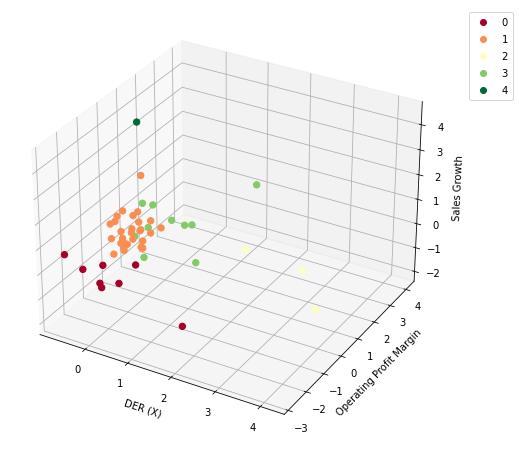

In [27]:
from mpl_toolkits.mplot3d import Axes3D
#sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (X)']
y = new_df['Operating Profit Margin']
z = new_df['Sales Growth']

ax.set_xlabel("DER (X)")
ax.set_ylabel("Operating Profit Margin")
ax.set_zlabel("Sales Growth")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### 2.5.2 X vs Z View

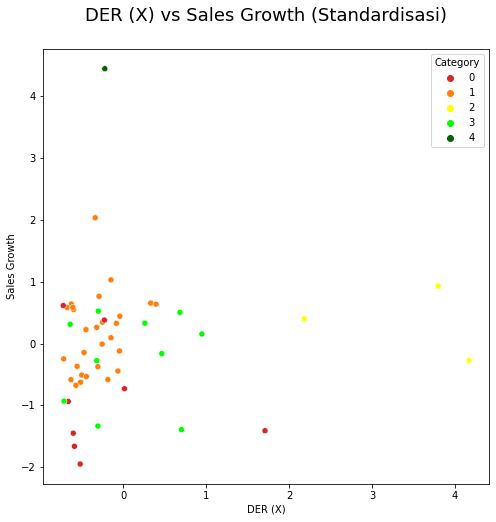

In [28]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (X)', y='Sales Growth', 
                hue='Category', data=new_df,
                palette=palette)
plt.title("DER (X) vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

### 2.5.3 X vs Y View

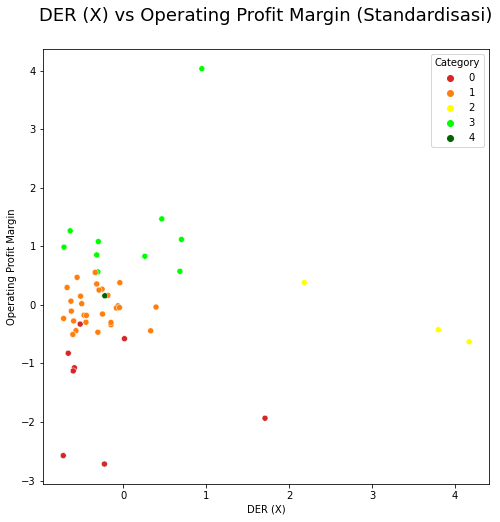

In [29]:
sns.scatterplot(x='DER (X)', y='Operating Profit Margin', 
                hue='Category', data=new_df,
                palette=palette)
plt.title("DER (X) vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 4. Export Result

Concat <b>Industry Emiten List</b> `dftemp`, <b>Initial Data Frame</b> `df0`, and <b>Result</b> `new_df`

In [30]:
df0.drop(["Category"], axis=1, inplace=True)
dftemp = pd.read_excel('industry-emiten-list.xlsx')
df = pd.concat([dftemp, df0, new_df], axis=1)
df.head(5)

,Industri,Nama Perusahaan,EMITEN,PER (X),PBV (X),EV/EBTIDA (X),BVPS,ROA,ROE,DER (X),...,Total Equity,EPS,Outstanding Shares,Cash From Operating Act,Cash From Investing Act,Cash From Financing Act,Category,DER (X),Operating Profit Margin,Sales Growth
0,Minyak & Gas,Perusahaan Gas Negara Tbk.,PGAS,-10.74,0.96,18.09,1719.63,-2.33,-8.96,1.55,...,41686465,-154.06,24242,5880017,578893,-4407952.0,1,-0.064043,-0.016215,-0.444654
1,Batu Bara,Adaro Energy Tbk.,ADRO,22.07,0.82,6.23,1742.61,3.48,3.72,0.61,...,55738926,64.79,31986,10387359,-5068420,-10973225.0,1,-0.500280,0.020286,-0.510410
2,"Pendukung Minyak, Gas & Batu Bara",Petrosea Tbk.,PTRO,4.28,0.60,2.77,3236.61,6.71,13.95,1.29,...,3264461,451.41,1009,1515766,-441360,-464012.0,1,-0.184705,0.162178,-0.582860
3,Barang Kimia,Barito Pacific Tbk.,BRPT,200.78,2.47,20.25,445.70,3.18,1.23,1.60,...,41623305,5.48,93389,6080172,-4766813,4203219.0,1,-0.040839,0.379129,0.441677
4,Material Konstruksi,Semen Indonesia (Persero) Tbk.,SMGR,26.39,2.07,12.22,6010.83,4.47,7.83,1.14,...,35653335,470.76,5932,7221257,-2251194,-6003196.0,1,-0.254317,0.268597,-0.009166


In [31]:
df.to_excel('result.xlsx', index = False)